In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pythainlp import word_tokenize

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout

print(f'Tensorflow version: {tf.__version__}')
# plt.style.use('seaborn-deep')

Tensorflow version: 2.10.0


In [2]:
df = pd.read_csv('Dataset/data_lyrics_for_train.csv')
df

,Name,Lyrics
0,จะเก็บเธออยู่ในใจเสมอ,และนี่คือเสียง เสียงเพลงที่มาจากใจ เธอจะอยู่ที...
1,เจ้าหญิง,ในคืนที่ฟ้านี้มีแต่ความมืดของดาว รู้สึกเหน็บหน...
2,ฉันดีใจที่มีเธอ,ในโลกที่มี ความวกวนในโลกที่ทุกคนต้องดิ้นรนที่ส...
3,ผมแอบชอบคุณอยู่,ผมขอเวลาบอกความจริงที่ผมซ่อนไว้ข้างใน ขอให้คุณ...
4,หัวใจผูกกัน,วันเวลาดี ๆ เหล่านั้น เธอยังคงจำมันได้ไหมวันที...
5,ห่างไกลเหลือเกิน,เวลามองขึ้นไปบนฟ้า ฉันนั้นเห็นแต่ภาพเธอ อยู่ไก...
6,เหมือนเคย,ยิ้มที่ดูสดใส กับหัวใจที่อ่อนหวานท่าทางเธอแบบน...
7,คนข้างล่าง,ฉันควรทำอย่างไร กับรักที่ไม่มีทางอยากรู้ว่าจะม...
8,ลูกอม,ในคืนที่ฟ้านั้นเต็มไปด้วยแสงไฟ เราโอบกอดกันและ...
9,ร่มสีเทา,ฉันเฝ้าถามความสุขอยู่ที่ไหน ชายที่เขาเดินผ่านฉ...


In [3]:
df['Lyrics_token'] = df['Lyrics'].apply(lambda text: word_tokenize(text,engine = 'newmm',keep_whitespace = False))
df

,Name,Lyrics,Lyrics_token
0,จะเก็บเธออยู่ในใจเสมอ,และนี่คือเสียง เสียงเพลงที่มาจากใจ เธอจะอยู่ที...,"[และ, นี่, คือ, เสียง, เสียงเพลง, ที่, มาจาก, ..."
1,เจ้าหญิง,ในคืนที่ฟ้านี้มีแต่ความมืดของดาว รู้สึกเหน็บหน...,"[ใน, คืน, ที่, ฟ้า, นี้, มี, แต่, ความมืด, ของ..."
2,ฉันดีใจที่มีเธอ,ในโลกที่มี ความวกวนในโลกที่ทุกคนต้องดิ้นรนที่ส...,"[ใน, โลก, ที่, มี, ความ, วกวน, ใน, โลก, ที่, ท..."
3,ผมแอบชอบคุณอยู่,ผมขอเวลาบอกความจริงที่ผมซ่อนไว้ข้างใน ขอให้คุณ...,"[ผม, ขอเวลา, บอก, ความจริง, ที่, ผม, ซ่อน, ไว้..."
4,หัวใจผูกกัน,วันเวลาดี ๆ เหล่านั้น เธอยังคงจำมันได้ไหมวันที...,"[วัน, เวลา, ดี ๆ, เหล่านั้น, เธอ, ยังคง, จำ, ม..."
5,ห่างไกลเหลือเกิน,เวลามองขึ้นไปบนฟ้า ฉันนั้นเห็นแต่ภาพเธอ อยู่ไก...,"[เวลา, มอง, ขึ้นไป, บน, ฟ้า, ฉันนั้น, เห็น, แต..."
6,เหมือนเคย,ยิ้มที่ดูสดใส กับหัวใจที่อ่อนหวานท่าทางเธอแบบน...,"[ยิ้ม, ที่, ดู, สดใส, กับ, หัวใจ, ที่, อ่อนหวา..."
7,คนข้างล่าง,ฉันควรทำอย่างไร กับรักที่ไม่มีทางอยากรู้ว่าจะม...,"[ฉัน, ควร, ทำ, อย่างไร, กับ, รัก, ที่, ไม่, มี..."
8,ลูกอม,ในคืนที่ฟ้านั้นเต็มไปด้วยแสงไฟ เราโอบกอดกันและ...,"[ใน, คืน, ที่, ฟ้า, นั้น, เต็มไปด้วย, แสงไฟ, เ..."
9,ร่มสีเทา,ฉันเฝ้าถามความสุขอยู่ที่ไหน ชายที่เขาเดินผ่านฉ...,"[ฉัน, เฝ้าถาม, ความสุข, อยู่, ที่ไหน, ชาย, ที่..."


In [4]:
df['Lyrics_token'] = df['Lyrics_token'].apply(lambda text: ' '.join(text))
df

,Name,Lyrics,Lyrics_token
0,จะเก็บเธออยู่ในใจเสมอ,และนี่คือเสียง เสียงเพลงที่มาจากใจ เธอจะอยู่ที...,และ นี่ คือ เสียง เสียงเพลง ที่ มาจาก ใจ เธอ จ...
1,เจ้าหญิง,ในคืนที่ฟ้านี้มีแต่ความมืดของดาว รู้สึกเหน็บหน...,ใน คืน ที่ ฟ้า นี้ มี แต่ ความมืด ของ ดาว รู้ส...
2,ฉันดีใจที่มีเธอ,ในโลกที่มี ความวกวนในโลกที่ทุกคนต้องดิ้นรนที่ส...,ใน โลก ที่ มี ความ วกวน ใน โลก ที่ ทุกคน ต้อง ...
3,ผมแอบชอบคุณอยู่,ผมขอเวลาบอกความจริงที่ผมซ่อนไว้ข้างใน ขอให้คุณ...,ผม ขอเวลา บอก ความจริง ที่ ผม ซ่อน ไว้ ข้างใน ...
4,หัวใจผูกกัน,วันเวลาดี ๆ เหล่านั้น เธอยังคงจำมันได้ไหมวันที...,วัน เวลา ดี ๆ เหล่านั้น เธอ ยังคง จำ มัน ได้ ไ...
5,ห่างไกลเหลือเกิน,เวลามองขึ้นไปบนฟ้า ฉันนั้นเห็นแต่ภาพเธอ อยู่ไก...,เวลา มอง ขึ้นไป บน ฟ้า ฉันนั้น เห็น แต่ ภาพ เธ...
6,เหมือนเคย,ยิ้มที่ดูสดใส กับหัวใจที่อ่อนหวานท่าทางเธอแบบน...,ยิ้ม ที่ ดู สดใส กับ หัวใจ ที่ อ่อนหวาน ท่าทาง...
7,คนข้างล่าง,ฉันควรทำอย่างไร กับรักที่ไม่มีทางอยากรู้ว่าจะม...,ฉัน ควร ทำ อย่างไร กับ รัก ที่ ไม่ มีทาง อยากร...
8,ลูกอม,ในคืนที่ฟ้านั้นเต็มไปด้วยแสงไฟ เราโอบกอดกันและ...,ใน คืน ที่ ฟ้า นั้น เต็มไปด้วย แสงไฟ เรา โอบกอ...
9,ร่มสีเทา,ฉันเฝ้าถามความสุขอยู่ที่ไหน ชายที่เขาเดินผ่านฉ...,ฉัน เฝ้าถาม ความสุข อยู่ ที่ไหน ชาย ที่ เขา เด...


In [5]:
df['Lyrics_token'] = df['Lyrics_token'].replace("\n","")
df

,Name,Lyrics,Lyrics_token
0,จะเก็บเธออยู่ในใจเสมอ,และนี่คือเสียง เสียงเพลงที่มาจากใจ เธอจะอยู่ที...,และ นี่ คือ เสียง เสียงเพลง ที่ มาจาก ใจ เธอ จ...
1,เจ้าหญิง,ในคืนที่ฟ้านี้มีแต่ความมืดของดาว รู้สึกเหน็บหน...,ใน คืน ที่ ฟ้า นี้ มี แต่ ความมืด ของ ดาว รู้ส...
2,ฉันดีใจที่มีเธอ,ในโลกที่มี ความวกวนในโลกที่ทุกคนต้องดิ้นรนที่ส...,ใน โลก ที่ มี ความ วกวน ใน โลก ที่ ทุกคน ต้อง ...
3,ผมแอบชอบคุณอยู่,ผมขอเวลาบอกความจริงที่ผมซ่อนไว้ข้างใน ขอให้คุณ...,ผม ขอเวลา บอก ความจริง ที่ ผม ซ่อน ไว้ ข้างใน ...
4,หัวใจผูกกัน,วันเวลาดี ๆ เหล่านั้น เธอยังคงจำมันได้ไหมวันที...,วัน เวลา ดี ๆ เหล่านั้น เธอ ยังคง จำ มัน ได้ ไ...
5,ห่างไกลเหลือเกิน,เวลามองขึ้นไปบนฟ้า ฉันนั้นเห็นแต่ภาพเธอ อยู่ไก...,เวลา มอง ขึ้นไป บน ฟ้า ฉันนั้น เห็น แต่ ภาพ เธ...
6,เหมือนเคย,ยิ้มที่ดูสดใส กับหัวใจที่อ่อนหวานท่าทางเธอแบบน...,ยิ้ม ที่ ดู สดใส กับ หัวใจ ที่ อ่อนหวาน ท่าทาง...
7,คนข้างล่าง,ฉันควรทำอย่างไร กับรักที่ไม่มีทางอยากรู้ว่าจะม...,ฉัน ควร ทำ อย่างไร กับ รัก ที่ ไม่ มีทาง อยากร...
8,ลูกอม,ในคืนที่ฟ้านั้นเต็มไปด้วยแสงไฟ เราโอบกอดกันและ...,ใน คืน ที่ ฟ้า นั้น เต็มไปด้วย แสงไฟ เรา โอบกอ...
9,ร่มสีเทา,ฉันเฝ้าถามความสุขอยู่ที่ไหน ชายที่เขาเดินผ่านฉ...,ฉัน เฝ้าถาม ความสุข อยู่ ที่ไหน ชาย ที่ เขา เด...


In [6]:
tokenizer = Tokenizer() 


tokenizer.fit_on_texts(df['Lyrics_token'])
totalWords = len(tokenizer.word_index) + 1 
print(f'Total unique word: {totalWords}')

Total unique word: 893


In [17]:
sequencesTokens = []

for token in df['Lyrics_token']:
    listToken = tokenizer.texts_to_sequences([token])[0]
#   print(token,listToken)
    for i in range(1, len(listToken)):
      sequenceToken = listToken[:i + 1]
    sequencesTokens.append(sequenceToken)

sequencesTokens[:5]

[[15,
  537,
  112,
  412,
  231,
  2,
  330,
  22,
  1,
  5,
  16,
  189,
  43,
  538,
  8,
  539,
  190,
  1,
  6,
  232,
  413,
  331,
  414,
  3,
  4,
  16,
  21,
  7,
  1,
  12,
  9,
  66,
  3,
  266,
  16,
  95,
  1,
  5,
  266,
  16,
  96,
  5,
  87,
  1,
  96,
  146,
  1,
  191,
  4,
  9,
  192,
  5,
  540,
  192,
  5,
  541,
  54,
  5,
  61,
  67,
  36,
  44,
  415,
  67,
  36,
  542,
  61,
  61,
  68,
  122,
  136,
  1,
  75,
  5,
  136,
  1,
  16,
  19,
  22,
  123,
  16,
  19,
  22,
  123,
  16,
  19,
  22,
  123,
  16,
  19,
  22,
  123,
  16,
  19,
  22,
  123],
 [19,
  113,
  2,
  76,
  42,
  6,
  14,
  543,
  37,
  97,
  114,
  416,
  417,
  115,
  4,
  6,
  33,
  193,
  267,
  21,
  7,
  233,
  42,
  6,
  14,
  97,
  544,
  545,
  332,
  88,
  7,
  418,
  546,
  33,
  67,
  23,
  39,
  1,
  11,
  124,
  89,
  27,
  2,
  30,
  419,
  7,
  333,
  77,
  268,
  269,
  6,
  14,
  17,
  16,
  270,
  271,
  272,
  97,
  15,
  6,
  57,
  7,
  147,
  7,
  1,
  20,
  234,
  235,

In [19]:
maxLength = max([len(x) for x in sequencesTokens])

sequencesTokens = pad_sequences(sequencesTokens,maxlen = maxLength,padding = 'pre')

sequencesTokens[:5]

array([[  0,   0,   0, ...,  19,  22, 123],
       [  0,   0,   0, ...,   6,   1,  90],
       [  0,   0,   0, ...,  16,  28,   3],
       [  0,   0,   0, ...,  48,  20, 569],
       [  0,   0,   0, ...,  17, 282,  26]])

In [20]:
features = sequencesTokens[:, :-1] 
features[:5]

array([[  0,   0,   0, ...,  16,  19,  22],
       [  0,   0,   0, ...,   5,   6,   1],
       [  0,   0,   0, ...,   1,  16,  28],
       [  0,   0,   0, ...,   5,  48,  20],
       [  0,   0,   0, ...,  27,  17, 282]])

In [21]:
labels = sequencesTokens[:, -1] 
labels

array([123,  90,   3, 569,  26,   1, 176,  90, 205,  70,  51,   3,  27,
       105,   3, 187, 123,   1, 191, 490,   1, 105, 455, 119, 171,  13,
        53,  29, 229,  79,   1, 265,   1, 892])

# One-hot Encode

In [22]:
labels = to_categorical(labels,num_classes = totalWords)
print(len(labels),len(labels[0]))
labels[:5]

34 893


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1]:
model = Sequential()
model.add(Embedding(totalWords, output_dim = 128, input_length = features.shape[1]))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(totalWords, activation = 'softmax'))
model.summary()

NameError: name 'Sequential' is not defined

In [28]:
EPOCHS = 1000
RATE = 0.001

opt = Adam(learning_rate = RATE)

model.compile(optimizer = opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(features,labels,epochs = EPOCHS, batch_size=50) 

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 3.0812 - accuracy: 0.1765
Epoch 2/1000
1/1 [==============================] - 0s 150ms/step - loss: 3.1389 - accuracy: 0.1471
Epoch 3/1000
1/1 [==============================] - 0s 151ms/step - loss: 3.1764 - accuracy: 0.1471
Epoch 4/1000
1/1 [==============================] - 0s 142ms/step - loss: 3.1170 - accuracy: 0.1176
Epoch 5/1000
1/1 [==============================] - 0s 150ms/step - loss: 3.1056 - accuracy: 0.1471
Epoch 6/1000
1/1 [==============================] - 0s 145ms/step - loss: 3.0871 - accuracy: 0.1471
Epoch 7/1000
1/1 [==============================] - 0s 150ms/step - loss: 3.1148 - accuracy: 0.1176
Epoch 8/1000
1/1 [==============================] - 0s 147ms/step - loss: 3.1947 - accuracy: 0.1471
Epoch 9/1000
1/1 [==============================] - 0s 142ms/step - loss: 3.1281 - accuracy: 0.1471
Epoch 10/1000
1/1 [==============================] - 0s 143ms/step - loss: 3.0726 - accuracy: 0.0882
Ep

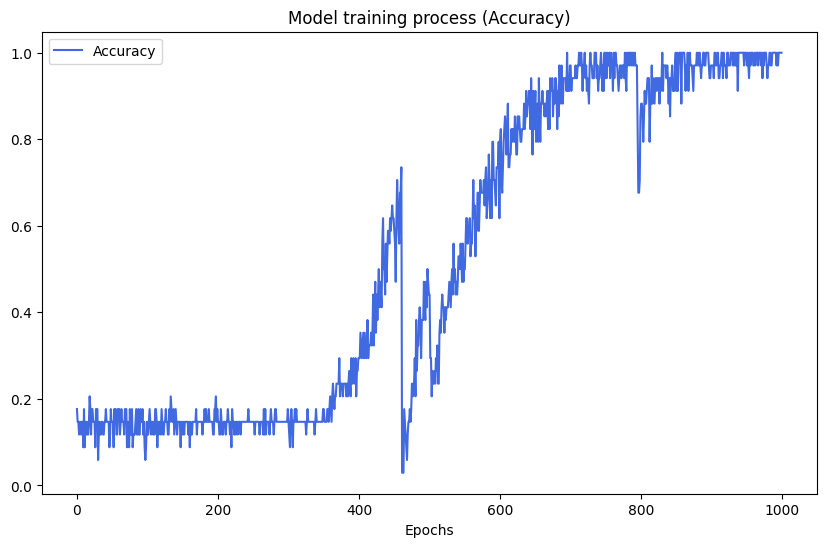

In [32]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['accuracy'],c = 'royalblue',label = 'Accuracy')
plt.legend(frameon = True, facecolor = 'white')
plt.title('Model training process (Accuracy)')
plt.xlabel('Epochs')
plt.show()

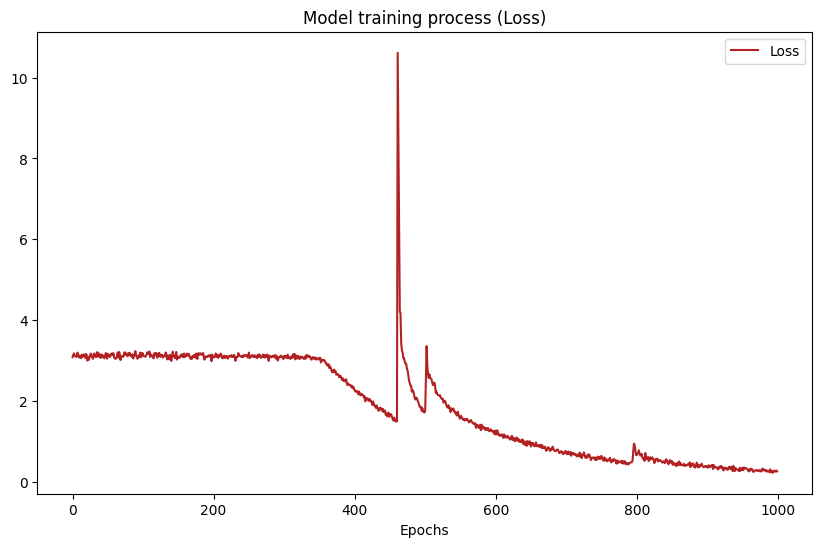

In [33]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'],c = 'firebrick',label = 'Loss')
plt.legend(frameon = True, facecolor = 'white')
plt.title('Model training process (Loss)')
plt.xlabel('Epochs')
plt.show()